## Домашнее задание №9

In [6]:
import numpy as np

In [7]:
import scipy.stats as stat

In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

### Задача 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):\
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],\
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].\
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).\
Произвести расчет как с использованием intercept, так и без.

### Решение:

In [47]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1. С помощью графика определим существует ли линейная зависимость между данными в двух выборках

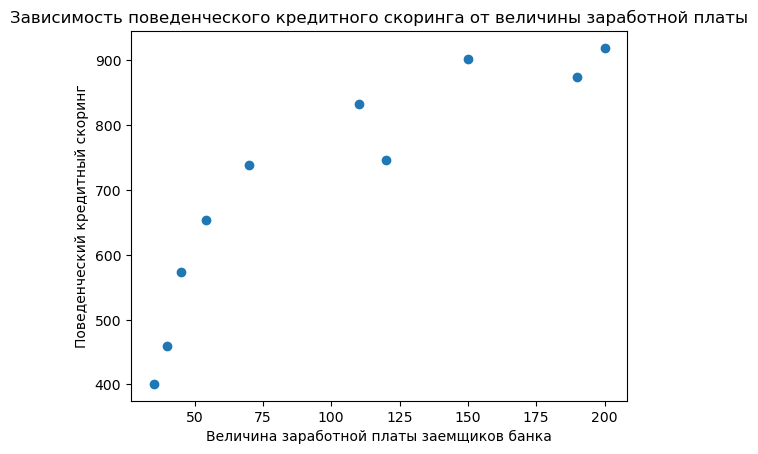

In [12]:
plt.scatter(zp,ks)
plt.title('Зависимость поведенческого кредитного скоринга от величины заработной платы')
plt.xlabel('Величина заработной платы заемщиков банка')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

2. На графике видно, что большим значениям заработной платы замещиков банка соответсвуют большие значения кредитного скоринга. Следовательно между данными возможна прямая линейная зависимость, которую можно описать некоторой линейной функцией, вида:    
$\displaystyle y=a+b\cdot x$  
Найдем коэффициент $b$ по формуле:  
$\displaystyle b=\frac{\bar{xy}-\bar x\cdot\bar y}{\bar{x^2}-{\bar x}^2}$\
формула свободного члена (интерсепта): $a=\bar y-b\cdot\bar x$

In [22]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - (np.mean(zp)**2))
a = np.mean(ks) - b * np.mean(zp)
print(f'Модель зависимости:     y = {a: .2f} + {b: .2f} * x')

Модель зависимости:     y =  444.18 +  2.62 * x


3. Отразим полученную модель на графике

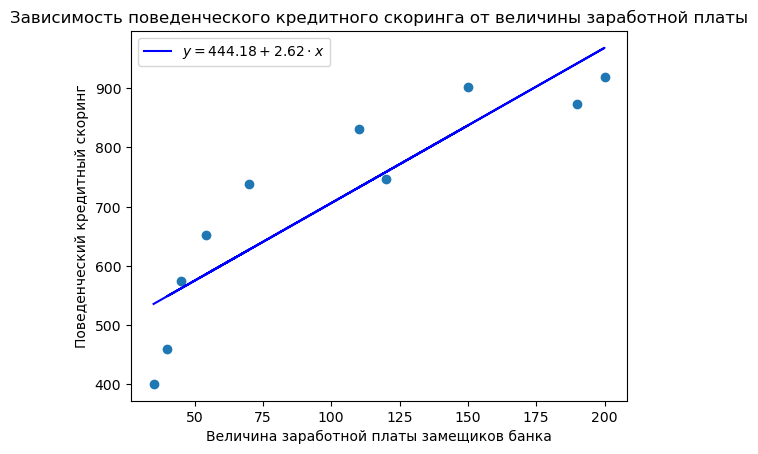

In [46]:
plt.scatter(zp,ks)
plt.title('Зависимость поведенческого кредитного скоринга от величины заработной платы')
plt.plot(zp, 444.18+2.62*zp, c='b', label=r'$y=444.18+2.62\cdot x$')
plt.legend()
plt.xlabel('Величина заработной платы замещиков банка')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

4. Рассчитаем коэффициент линейной регрессии без свободного члена (интерсепта) с помощью матричного метода.
Линейная взвимосвязь переменных будет описываться функцией вида: $y=b\cdot x$  


In [27]:
x = zp.reshape((len(zp), 1))
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [28]:
y = ks.reshape((len(ks), 1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [30]:
b = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T @ y)
print(b)

[[5.88982042]]


Модель зависимости без интерсепта: у = 5.89 * x\
Отразим модель на графике

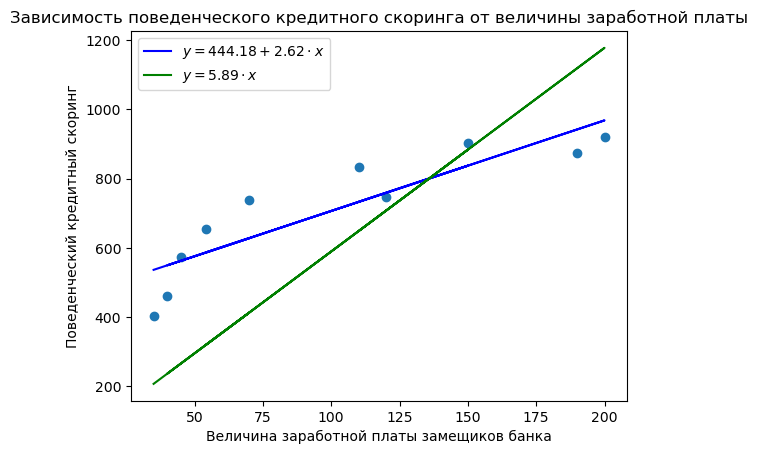

In [45]:
plt.scatter(zp,ks)
plt.title('Зависимость поведенческого кредитного скоринга от величины заработной платы')
plt.plot(zp, 444.18+2.62*zp, c='b', label=r'$y=444.18+2.62\cdot x$')
plt.plot(zp, b*x, c='g', label=r'$y=5.89\cdot x$')
plt.legend()
plt.xlabel('Величина заработной платы замещиков банка')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

### Задача 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

### Решение:

In [48]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1. В качестве функции потерь выберем среднеквадратическую ошибку:
$\displaystyle MSE=\frac{1}{n}\sum^{n}_{i=1}(\hat y_i-y_i)^2$ 


In [56]:
def mse(b, x, y):
    return np.sum((b * x - y) ** 2) / len(x)

In [57]:
mse(2.62, zp, ks)

203812.48504

2. Подобирем значение коэффициента $b$, при котором $MSE\rightarrow 0$, используя свойства производной.  
Для этого вычислим производную нашей функции потерь:   
Так же введем параметр - скорость обучения c помощью которого будем регулировать скорость подбора коэффициента $b$

In [58]:
def mse_p(b, x, y):
    return (2 / len(x)) * np.sum((b * x - y) * x)

In [70]:
alpha = 1e-06
b = 0.1
mse_min = mse(b, zp, ks)
i_min = 1
b_min = b

for i in range(10 ** 3):
     b -= alpha * mse_p(b, zp, ks)
     if i % 100 == 0:
        print(f'Итерация #{i}, b={b}, mse={mse(b, zp, ks)}')
     if mse(b, zp, ks) > mse_min:
        print(f'Итерация #{i_min}, b={b_min}, mse={mse_min},\nДостигнут минимум.')
        break
     else:
        mse_min = mse(b,zp,ks)
        i_min = i
        b_min = b

Итерация #0, b=0.25952808000000005, mse=493237.7212546963
Итерация #100, b=5.54537842245223, mse=58151.31823171113
Итерация #200, b=5.868748638669329, mse=56522.97550129376
Итерация #300, b=5.888531320728348, mse=56516.88130936019
Итерация #400, b=5.8897415574471985, mse=56516.85850140053
Итерация #500, b=5.889815595583751, mse=56516.858416040064
Итерация #600, b=5.889820124983314, mse=56516.85841572062
Итерация #628, b=5.889820285147628, mse=56516.85841571966,
Достигнут минимум.


In [74]:
print(f'Коэффициент линейной регрессии = {b_min: .2f}')

Коэффициент линейной регрессии =  5.89


### Задача 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

### Решение:

1. Функция потерь для модели с интерсептом:

In [75]:
def mse_ab(a, b, x, y):
    return np.sum(((a + b * x) - y) ** 2) / len(x)

2. Частная производная функции потерь по $a$:  

In [76]:
def mse_pa(a, b, x, y): 
    return 2 * np.sum((a + b * x) - y) / len(x)

3. Частная производная функции потерь по $b$:

In [77]:
def mse_pb(a, b, x, y):
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)

In [82]:
alpha = 5e-05
b = 0.1
a = 0.1
mseab_min =mse_ab(a, b, zp, ks)
i_min = 1
b_min = b
a_min = a
   
for i in range(10 ** 6):
    a -= alpha * mse_pa(a, b, zp, ks)
    b -= alpha * mse_pb(a, b, zp, ks)
    if i % 50000 == 0:
        print(f'Итерация #{i}, a={a}, b={b}, mse={mse_ab(a, b, zp, ks)}')
    if mse_ab(a, b, zp, ks) > mseab_min:
        print(f'Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут минимум.')
        break
    else:
        mseab_min =mse_ab(a, b, zp, ks)
        i_min = i
        b_min = b
        a_min = a

Итерация #0, a=0.169966, b=8.07468054476, mse=122318.06397097567
Итерация #50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
Итерация #100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
Итерация #150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
Итерация #200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
Итерация #250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
Итерация #300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
Итерация #350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
Итерация #400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
Итерация #450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
Итерация #500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
Итерация #520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592,
Достигнут минимум.


In [84]:
print(f'Коэффициенты линейной регрессии:\na = {a_min: .2f}\nb = {b_min: .2f}')

Коэффициенты линейной регрессии:
a =  444.18
b =  2.62
